In [37]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
source_train_dir = './original_data/train'
source_test_dir = './original_data/test'
target_base = 'data'

split_ratios = [0.85, 0.15]

for class_name in os.listdir(source_train_dir):
    class_path = os.path.join(source_train_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    files = os.listdir(class_path)
    random.shuffle(files)

    total = len(files)
    train_end = int(split_ratios[0] * total)

    split_files = {
        'train': files[:train_end],
        'val': files[train_end:]
    }

    for split in ['train', 'val']:
        split_dir = os.path.join(target_base, split, class_name)
        os.makedirs(split_dir, exist_ok=True)
        for file in split_files[split]:
            src = os.path.join(class_path, file)
            dst = os.path.join(split_dir, file)
            shutil.copy2(src, dst)

for class_name in os.listdir(source_test_dir):
    class_path = os.path.join(source_test_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    target_class_dir = os.path.join(target_base, 'test', class_name)
    os.makedirs(target_class_dir, exist_ok=True)

    for file in os.listdir(class_path):
        src = os.path.join(class_path, file)
        dst = os.path.join(target_class_dir, file)
        shutil.copy2(src, dst)


Distribution of Images in Each Subset:
Mild Impairment: Train: 2552, Val: 977, Test: 179
Moderate Impairment: Train: 2551, Val: 980, Test: 12
No Impairment: Train: 2553, Val: 998, Test: 640
Very Mild Impairment: Train: 2554, Val: 986, Test: 448


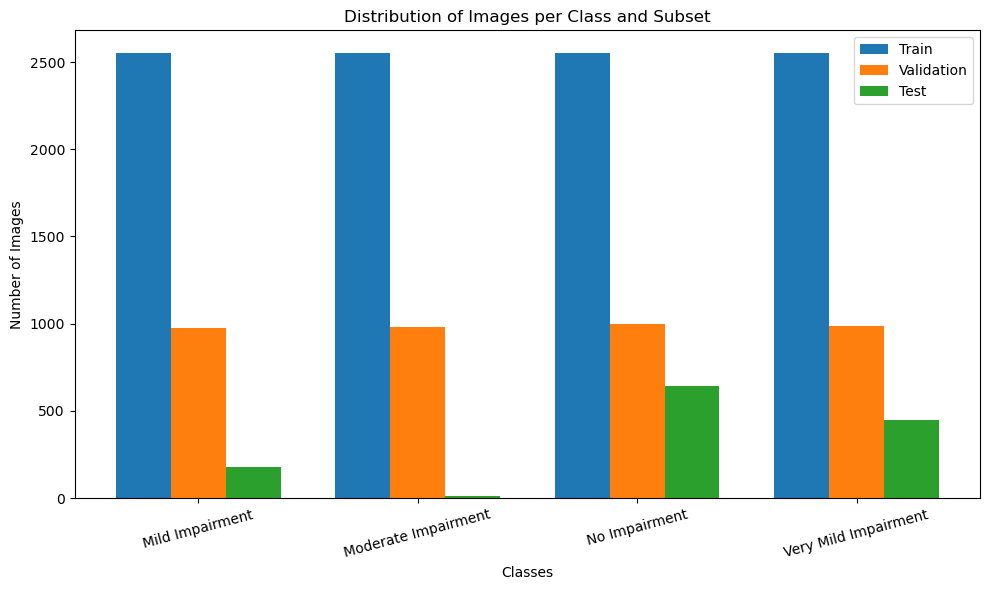

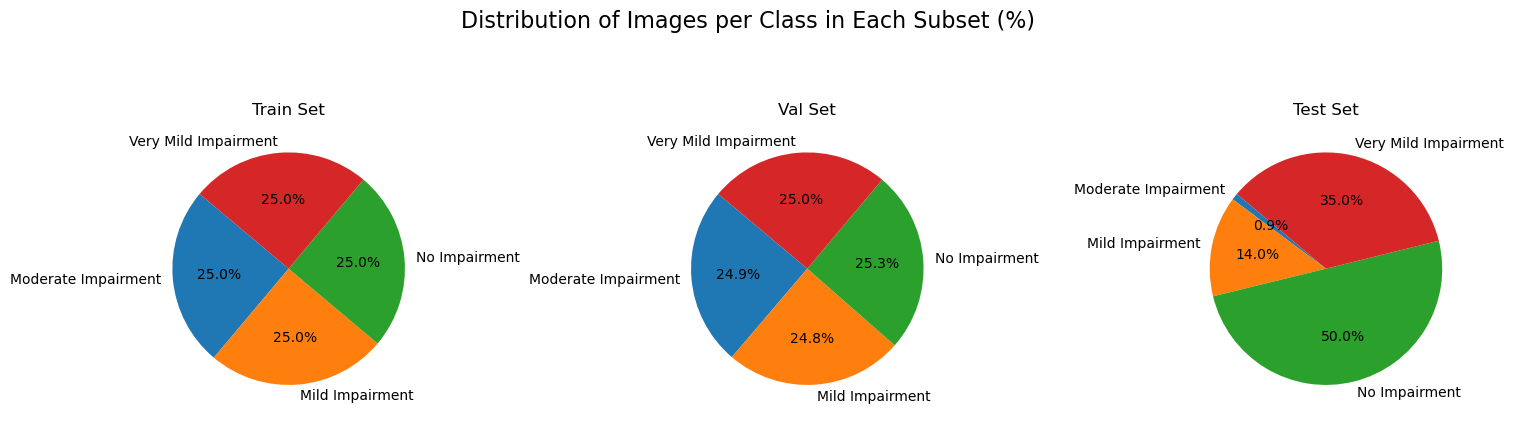

In [27]:
base_path = "./data" 

data_counts = {
    "train": defaultdict(int),
    "val": defaultdict(int),
    "test": defaultdict(int)
}

for subset in data_counts.keys():
    subset_path = os.path.join(base_path, subset)
    for label in os.listdir(subset_path):
        label_path = os.path.join(subset_path, label)
        count = len(os.listdir(label_path))
        data_counts[subset][label] = count

labels = sorted(list(data_counts["train"].keys()))
x = range(len(labels))
bar_width = 0.25

train_counts = [data_counts["train"][label] for label in labels]
val_counts = [data_counts["val"][label] for label in labels]
test_counts = [data_counts["test"][label] for label in labels]

print("Distribution of Images in Each Subset:")
for label in labels:
    print(f"{label}: Train: {data_counts['train'][label]}, Val: {data_counts['val'][label]}, Test: {data_counts['test'][label]}")

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width for i in x], train_counts, width=bar_width, label='Train')
plt.bar(x, val_counts, width=bar_width, label='Validation')
plt.bar([i + bar_width for i in x], test_counts, width=bar_width, label='Test')

plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class and Subset")
plt.xticks(ticks=x, labels=labels, rotation=15)
plt.legend()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, subset in enumerate(["train", "val", "test"]):
    counts = data_counts[subset]
    axes[i].pie(
        counts.values(),
        labels=counts.keys(),
        autopct='%1.1f%%',
        startangle=140
    )
    axes[i].set_title(f"{subset.capitalize()} Set")

plt.suptitle("Distribution of Images per Class in Each Subset (%)", fontsize=16)
plt.tight_layout()
plt.show()


rogosidade, luminosidade, contornos, areas
ferrramentas de processamento de imagem médica ( python, kaggle, ...)
para nos dar as features

CNN ESTUDAR AS CAMADAS E VER OQ ELAS ESTAO A FAZER
neurokit
machine learning com estas features vs deep learning


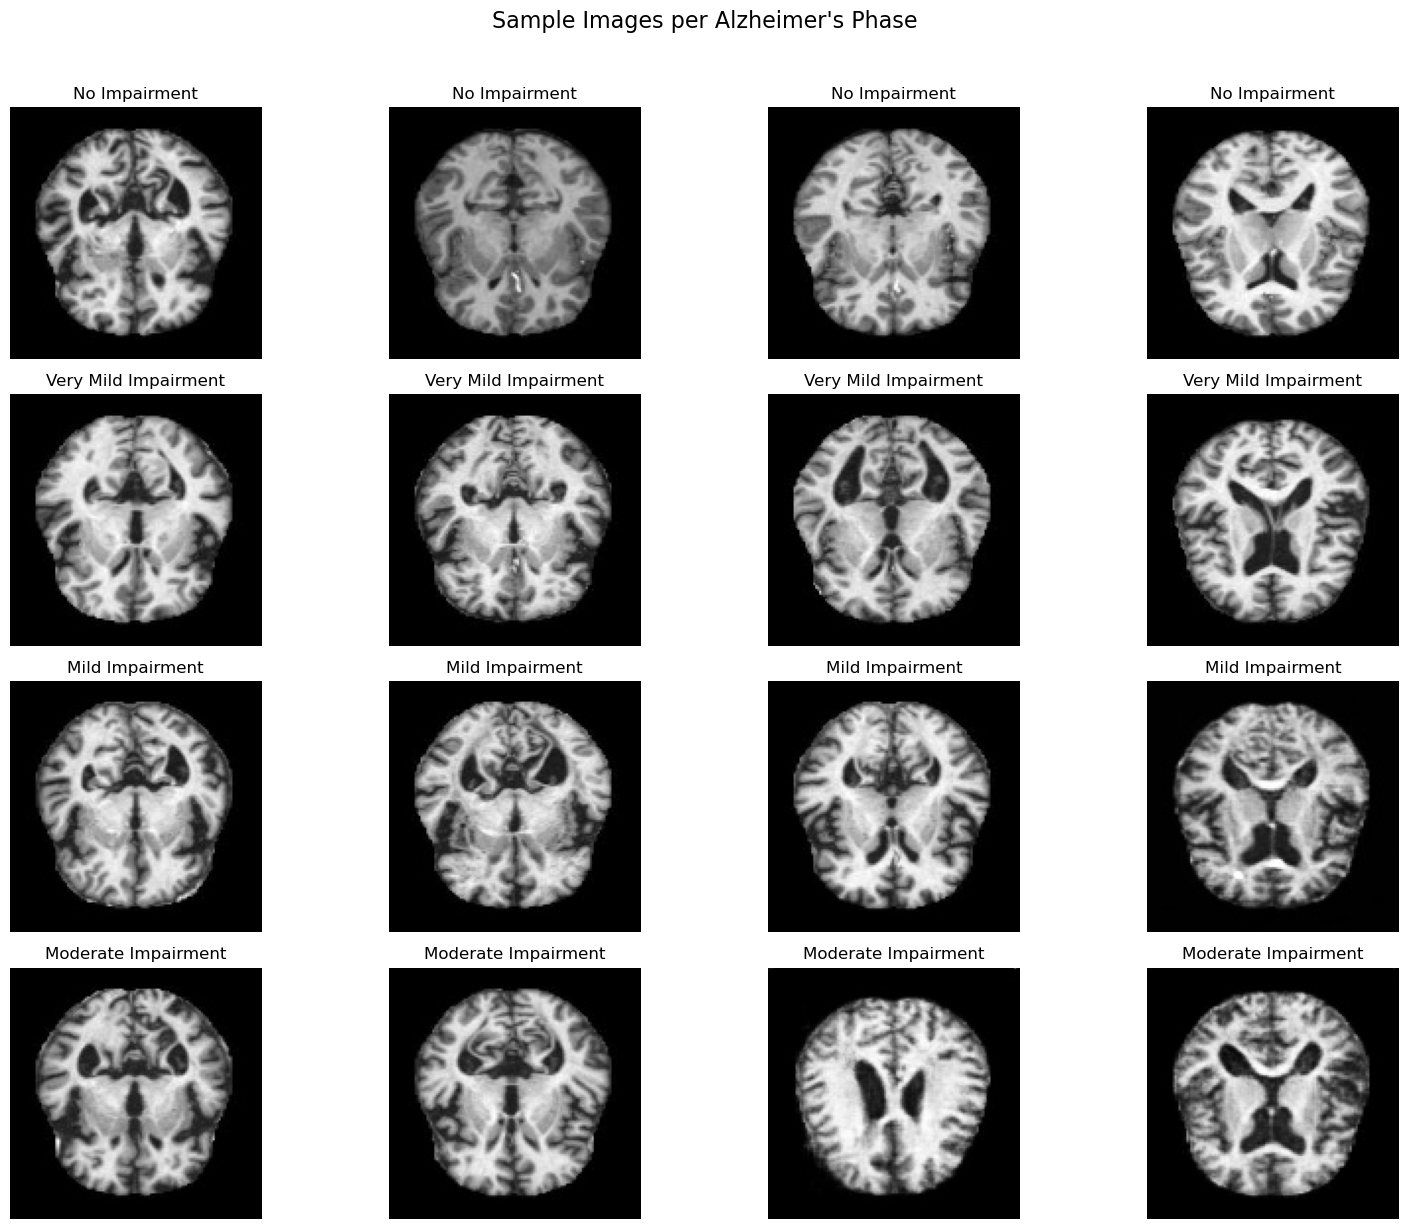

In [32]:

dataset_path = "./data/train" 

ordered_classes = [
    "No Impairment",          
    "Very Mild Impairment",   
    "Mild Impairment",        
    "Moderate Impairment"     
]

available_classes = os.listdir(dataset_path)
classes = [cls for cls in ordered_classes if cls in available_classes]

n_images = 4

plt.figure(figsize=(n_images * 4, len(classes) * 3))
img_index = 1

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    images = sorted([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

    for i in range(min(n_images, len(images))):
        img_path = os.path.join(class_path, images[i])
        try:
            img = Image.open(img_path)
            plt.subplot(len(classes), n_images, img_index)
            plt.imshow(img, cmap='gray')
            plt.title(cls)
            plt.axis('off')
            img_index += 1
        except Exception as e:
            print(f"Erro ao abrir imagem {img_path}: {e}")

plt.suptitle("Sample Images per Alzheimer's Phase", fontsize=16, y=1.02) 
plt.tight_layout()
plt.show()



Tamanhos de imagem (largura x altura):
(128, 128): 10240 imagens

Modos de cor encontrados:
L: 10240 imagens

Número de imagens por classe:
Mild Impairment: 2560
Moderate Impairment: 2560
No Impairment: 2560
Very Mild Impairment: 2560


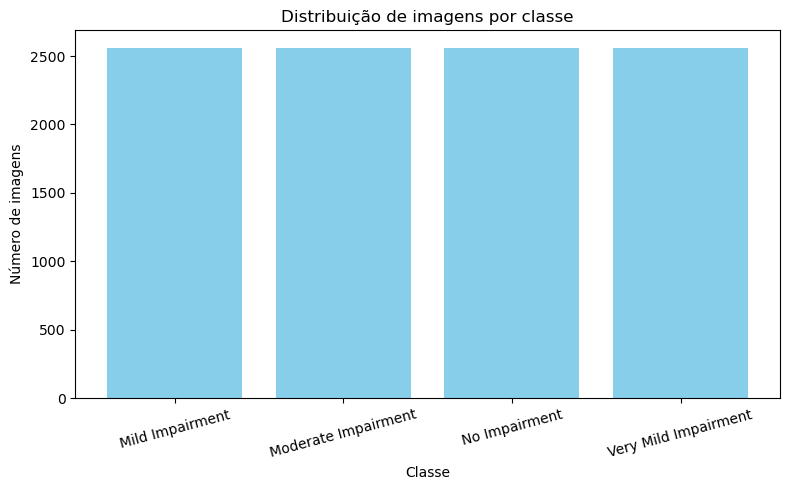

In [35]:

dataset_path = "./original_data/train"

image_shapes = defaultdict(int)
color_modes = defaultdict(int)
class_counts = {}

for cls in sorted(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, cls)
    if not os.path.isdir(class_path):
        continue

    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    class_counts[cls] = len(images)

    for img_file in images:
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                image_shapes[img.size] += 1
                color_modes[img.mode] += 1
        except Exception as e:
            print(f"Erro ao abrir imagem: {img_path}\n{e}")

print("\nTamanhos de imagem (largura x altura):")
for shape, count in image_shapes.items():
    print(f"{shape}: {count} imagens")

print("\nModos de cor encontrados:")
for mode, count in color_modes.items():
    print(f"{mode}: {count} imagens")

print("\nNúmero de imagens por classe:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Classe")
plt.ylabel("Número de imagens")
plt.title("Distribuição de imagens por classe")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Caminhos
train_dir = "./data/train"
val_dir = "./data/val"
test_dir = "./data/test"

# Parâmetros
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

# Apenas normalização (sem augmentation)
datagen = ImageDataGenerator(rescale=1./255)

# Carregar datasets
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Base MobileNetV2 pré-treinada (sem as camadas finais)
base_model = MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Inicialmente congelar

# Construir modelo
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compilar
model.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = callbacks.EarlyStopping(patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(patience=2, factor=0.5)

# Treinar
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)

# ➤ FINE-TUNING: Descongela parte da base
base_model.trainable = True
model.compile(
    optimizer=optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Treinar novamente com fine-tuning
history_finetune = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)

# Avaliar
loss, acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {acc:.2%}")


Found 10210 images belonging to 4 classes.
Found 3941 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


2025-05-10 00:27:24.773735: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/home/alof/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


320/320 ━━━━━━━━━━━━━━━━━━━━ 60s 179ms/step - accuracy: 0.5852 - loss: 0.9530 - val_accuracy: 0.7668 - val_loss: 0.5703 - learning_rate: 0.0010
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 55s 171ms/step - accuracy: 0.7205 - loss: 0.6370 - val_accuracy: 0.8056 - val_loss: 0.4812 - learning_rate: 0.0010
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 55s 173ms/step - accuracy: 0.7572 - loss: 0.5583 - val_accuracy: 0.7863 - val_loss: 0.4713 - learning_rate: 0.0010
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 55s 171ms/step - accuracy: 0.7817 - loss: 0.5120 - val_accuracy: 0.7970 - val_loss: 0.4517 - learning_rate: 0.0010
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 58s 181ms/step - accuracy: 0.7800 - loss: 0.4924 - val_accuracy: 0.8300 - val_loss: 0.4073 - learning_rate: 0.0010
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 60s 187ms/step - accuracy: 0.7949 - loss: 0.4780 - val_accuracy: 0.8495 - val_loss: 0.3780 - learning_rate: 0.0010
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 58s 181ms/step - accuracy: 0.7946 - loss: